<a href="https://colab.research.google.com/github/Sachin20010517/sca-supervised-prediction-model/blob/main/sca_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;">Heart Diseases: What are the indicators?</div>

<br> </br>
<div>    

<img src="https://images2.minutemediacdn.com/image/upload/c_fill,w_1080,ar_16:9,f_auto,q_auto,g_auto/shape%2Fcover%2Fsport%2F535618-istock-819924240-2470f65174198a2b48b33619995f99ad.jpg" width="550/">    
</div>

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 12px;border-style: solid;border-color: dark green;"><p><b><a href="https://www.mentalfloss.com/article/535618/super-ekg-could-diagnose-heart-disease-90-seconds" target="">Image source</a></b></p></div>


# 0. **Introduction** <a class="anchor" id="0"></a>
"Heart disease, also referred as cardiovascular diseases, is broad term used for diseases and conditions affecting the heart and circulatory system. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to **heart failure** and **heart attack**." [[Source](https://www.indushealthplus.com/heart-diseases.html)]

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color:#4e4e4e; padding: 1em; margin:24px;">

<font color="white" size=+1.0><b>Key facts according to WHO (World Health Organaizations)</b></font>  
        
<ul>
<li> Cardiovascular diseases (CVDs) are the leading cause of death globally.
<li> An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
<li> Over three quarters of CVD deaths take place in low- and middle-income countries.
<li> Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.
<li> Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
<li> It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.                                                                                                                                 
    
</ul>        
</blockquote>

#### **Objectives**
This notebook has two main objectives:
* Explore the heart disease dataset using exploratory data analysis (EDA)
* Exercise with classification algorithms for prediction (modelling)
---

<a id="top"></a>

## **Table of Contents**

* [0. Introduction](#0)
* [1. Exploratory Data Analysis](#1)
    * [1.1 Data Dictionary](#1.1)
    * [1.2 Data Pre-processing](#1.2)
    * [1.3 Exploring Features](#1.3)
    * [1.4 Correlations Heatmap](#1.4)
    * [1.5 EDA Summary](#1.5)
* [2. Predictions](#2)
    * [2.1 Scikit Learn Classifiers](#2.1)
    * [2.2 Catboost, Lgbm and Xgboost](#2.2)
    * [2.3 Model Explainablity](#2.3)
* [3. Concluding Remarks](#3)
* [4. Reference](#4)


---
# 1. **Exploratory Data Analysis** <a class="anchor" id="1"></a>
---

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv('new_mihishi_sca-dataset.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (1100, 14)


In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,37,1,0,148,274,0,0,111,1,0.5,1,1,1,0
1,36,1,1,119,241,0,1,169,0,0.0,0,0,2,1
2,43,0,2,128,263,0,1,97,0,1.2,1,1,3,0
3,33,1,0,106,230,1,1,145,0,0.0,2,3,3,1
4,37,1,0,132,184,0,0,105,1,2.1,1,1,1,0


In [6]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


**Note**: From the data types we see that all features are `int64/float64`. But that is because some of the categorical features including the target (has disease/no disease) are already label encoded for us. We will, in the section below, see a detailed decreption of the features.

---
## 1.1 **Data Dictionary** <a class="anchor" id="1.1"></a>

1. age: age in years
2. sex: sex
    * 1 = male
    * 0 = female
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
    * 1 = true;
    * 0 = false
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
    * 1 = yes
    * 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
    * 0 = `error (in the original dataset 0 maps to NaN's)`
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
14. target (the lable):
    * 0 = no disease,
    * 1 = disease
---    
**Note on the target label**:

`Diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing`
    
**Notes from the discussion forum of the dataset**:

* data #93, 159, 164, 165 and 252 have `ca=4` which is incorrect. In the original Cleveland dataset they are NaNs.
* data #49 and 282 have `thal = 0`, also incorrect. They are also NaNs in the original dataset.

**Action**:  Drop the faulty data! (7 data entry will be dropped)

---

<a href="#top">☝️ Back to top</a>

## 1.2 **Data pre-processing** <a class="anchor" id="1.2"></a>
### 1.2.1 Drop faulty data
Based on our investigation we did above, we will drop 7 rows.

In [7]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 1000!')

The length of the data now is 1093 instead of 1000!


### 1.2.2 Rename columns for the sake of clarity
* The feature names in the dataset are abbreviated and hard to understand their meaning. A full medical/technical name is hard enough to understand for most of us let alone their short form. So to make them a little bit easier to read we will, here under, change the column names of the data frame using information from the UCL data repository.
* We'll also replace the coded categories (0, 1, 2,..) to their medical meaning ('atypical angina', 'typical angina', etc. for example)
* **Note**: I borrowed [Rob Harrand's](https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model) idea of re-naming the columns.

In [8]:
data = data.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [9]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [10]:
data.dtypes

,0
age,int64
sex,object
chest_pain_type,object
resting_blood_pressure,int64
cholesterol,int64
fasting_blood_sugar,object
resting_electrocardiogram,object
max_heart_rate_achieved,int64
exercise_induced_angina,object
st_depression,float64


In [11]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,37,male,typical angina,148,274,lower than 120mg/ml,normal,111,yes,0.5,flat,1,fixed defect,0
1,36,male,atypical angina,119,241,lower than 120mg/ml,ST-T wave abnormality,169,no,0.0,upsloping,0,normal,1
2,43,female,non-anginal pain,128,263,lower than 120mg/ml,ST-T wave abnormality,97,no,1.2,flat,1,reversable defect,0
3,33,male,typical angina,106,230,greater than 120mg/ml,ST-T wave abnormality,145,no,0.0,downsloping,3,reversable defect,1
4,37,male,typical angina,132,184,lower than 120mg/ml,normal,105,yes,2.1,flat,1,fixed defect,0


### 1.2.3 Grouping Features (by data type)
* As we have seen above there are three datatypes i.e **object**, **int** and **floats**. Let's group them according to type.


In [12]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

## 1.3 **Exploring Features/Target** <a class="anchor" id="1.3"></a>

In this section we'll investigate all the features (including the target) in detail. We will look at the statistical summary when possible and the distributions of some of them as well, starting from the target.

### 1.3.1 Target distribution

We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.


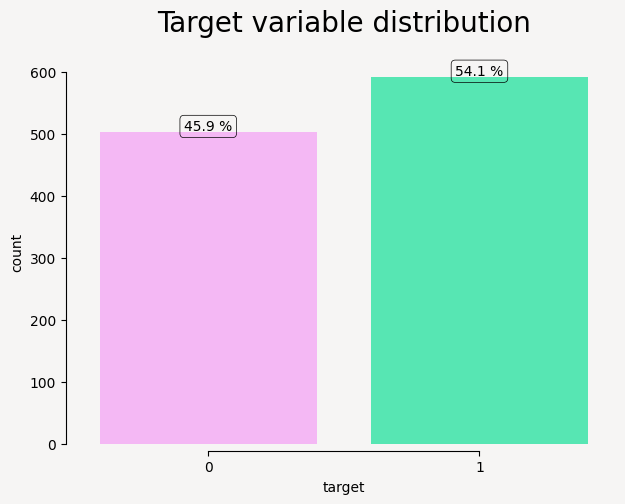

In [13]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

### 1.3.2 Numerical Features

#### Statistical summary

For the numerical features we can apply the handy pandas `data.describe()` method and get the global statistical summary. Key figures are highlighted below.

In [14]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1093.0,35.330284,7.608300,18.0,29.0,36.0,42.0,45.0
cholesterol,1093.0,244.738335,49.293536,126.0,209.0,241.0,275.0,564.0
resting_blood_pressure,1093.0,130.738335,17.303189,94.0,119.0,130.0,140.0,200.0
max_heart_rate_achieved,1093.0,148.427264,23.113145,71.0,132.0,151.0,164.0,202.0
st_depression,1093.0,1.005581,1.127258,0.0,0.0,0.7,1.6,6.2
num_major_vessels,1093.0,0.673376,0.914072,0.0,0.0,0.0,1.0,3.0


### **Statistical summary of the numerical features**

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">
   
<ul>
<li> <font color="white" size=+1.0><b>Age</b></font> :
    <ul>
    <li> The average age in the dataset is 54.5 years
    <li> The oldest is 77 years, whereas the youngest is 29 years old
    </ul>
<li> <font color="white" size=+1.0><b>Cholesterol:</b></font>
    <ul>
    <li> The average registered cholestrol level is 247.15
    <li> Maximum level is 564 and the minimum level is 126.
    <li> <strong>Note</strong>: According to [6], a healthy cholesterol level is $<200 mg/dl$ and usually high level of cholesterol is associated with heart disease.
    </ul>
<li> <font color="white" size=+1.0><b>Resting blood pressure:</b></font>
    <ul>
    <li> 131 mean, 200 max and 94 min
    </ul>
<li> <font color="white" size=+1.0><b>Max heart rate achieved:</b></font>
    <ul>
    <li> The abverage max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.
    </ul>
<li> <font color="white" size=+1.0><b>St_depression:</b></font>
    <ul>
    <li> The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.
    </ul>
<li> <font color="white" size=+1.0><b>Number of major blood vessels:</b></font>
    <ul>
    <li> A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.
    </ul>
</ul>                                                                                                                                             
</blockquote>                                                                                                                                            

#### Distribution: Density plots

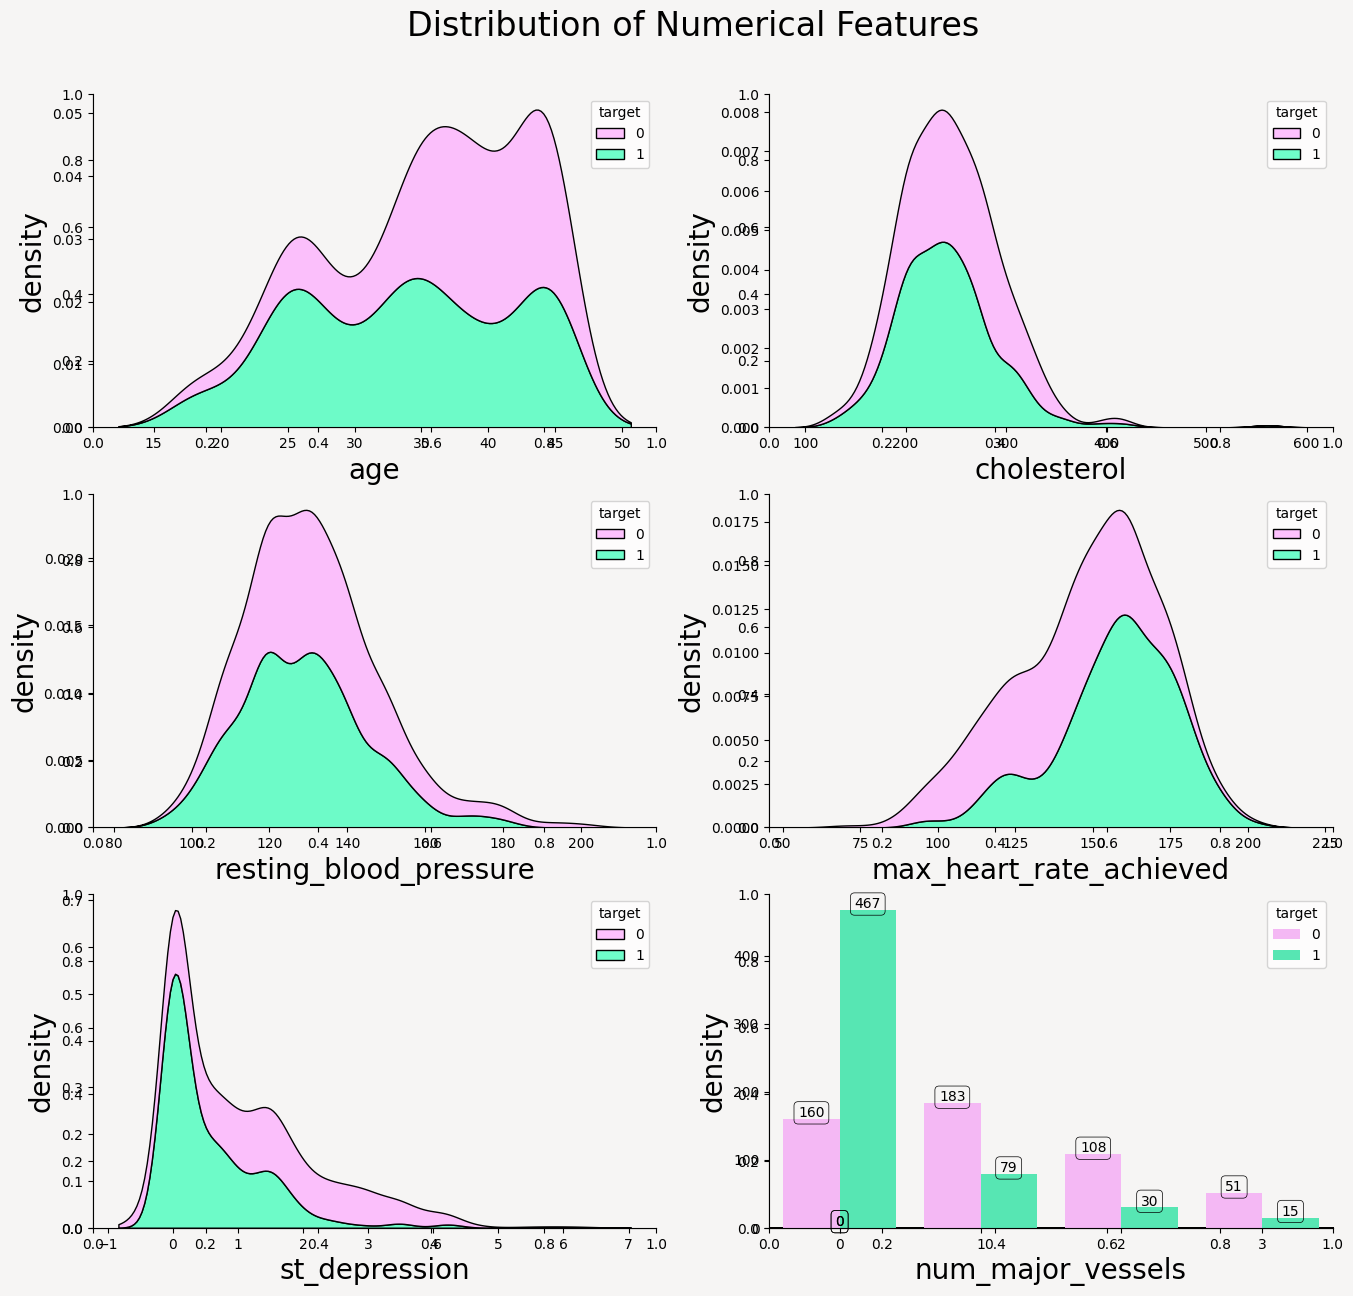

In [15]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4])
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);

#### Pair-plots

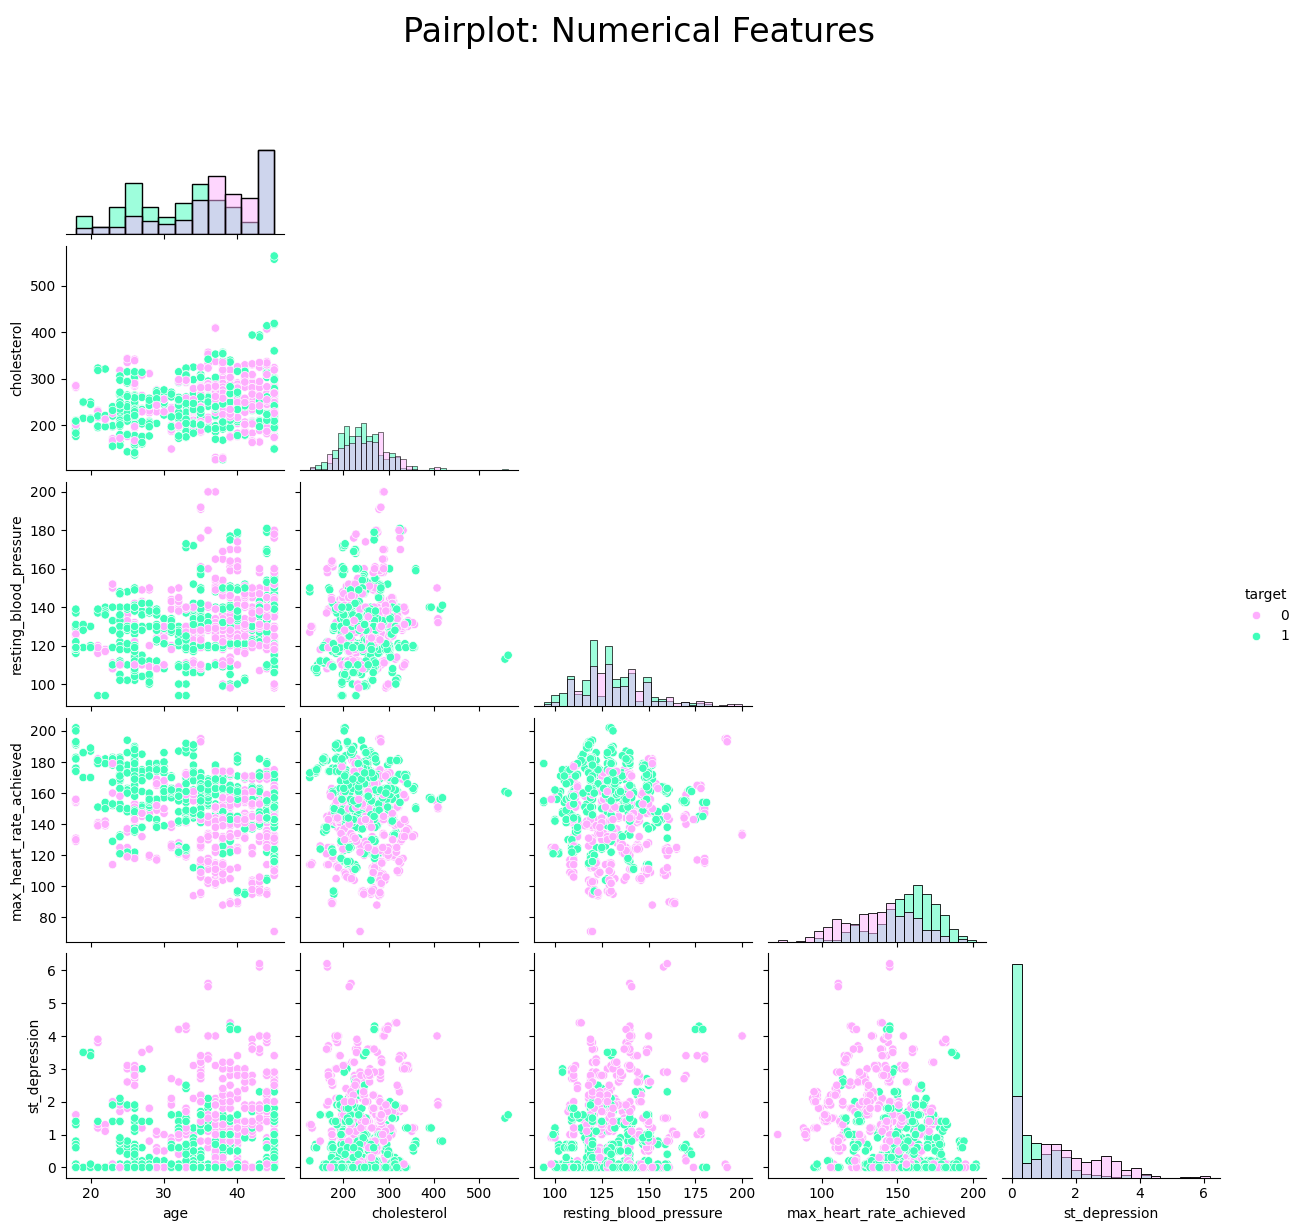

In [16]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

#### Selected Features

Below are reg-plots of some selected features showing the linear relation with Age, similar to the first column in the pair-plot above. We observe that:
- Except `maximum_heart_rate_achieved`, the others are positively and linearly related with `age` (albeit a weaker relation with `st_depression`).
- Younger patients with higher `maximum_heart_rate_achieved` are more likely to have a heart condition.
- Lower `st_depression` regardless of age is also likely an indication of a heart disease.


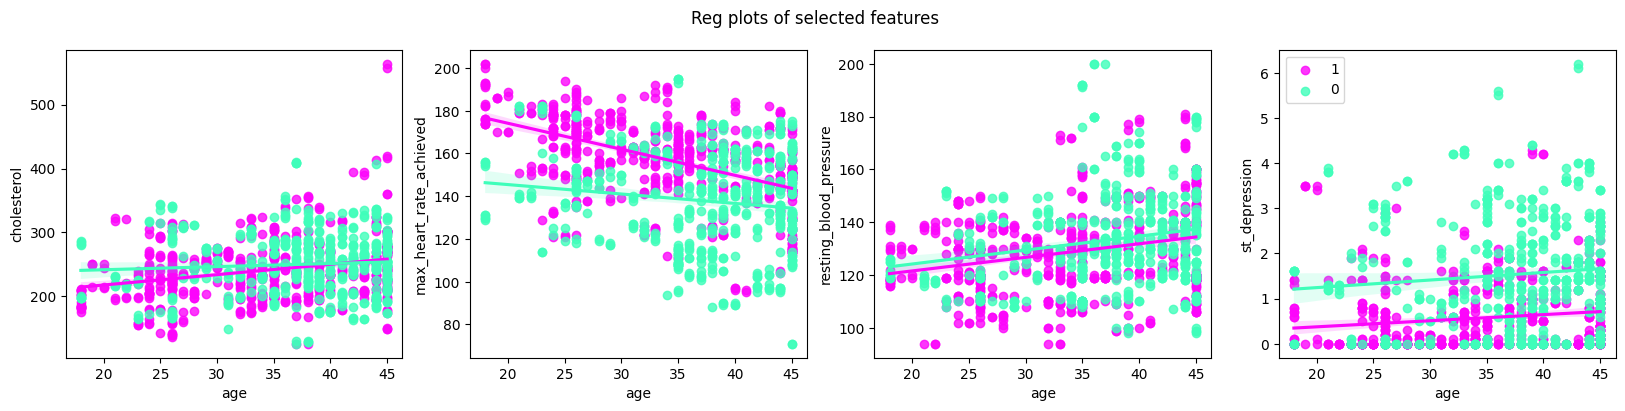

In [17]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();


### 1.3.3 Categorical Features

                                                                                                                                    
We use a count plot to visualize the different categories with respect to the target variable. Two things we could take note of are the distribution of each category in the dataset and their contribution to the probability of correct prediction of the target variable, i.e has disease (=1) or has no disease (=0). Below is the summary of the categorical features.

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">
   
<ul>
<li> <font color="white" size=+1.0><b>Chest Pain:</b></font>
    <ul>
        <li> More than 75% of the patients experience either <strong><em>typical angina</em></strong> or <strong><em>non-angina</em></strong> chest pain.
        <li> Patients who experienced <em>atypical angina</em> or <strong>non-angina</strong> chest pain are more likely to have a heart disease.
    </ul>  
    
<li> <font color="white" size=+1.0><b>Resting Electrocardiogram:</b></font>
    <ul>
        <li> Patients with <strong>Left ventricular hypertrophy</strong> are the fewest (~1.4%). The rest is almost a 50-50 split between patients with <strong>ST-T abnormality</strong> and those with normal REC tests.
        <li> <strong>ST-T abnormality</strong>  seem to have a better correlation with the target, i.e the majority of patients with this kind of REC test ended up with a heart disease.
</ul>    
<li> <font color="white" size=+1.0><b>ST-Slope:</b></font>
    <ul>
    <li> Most patients have a <strong>downsloping</strong> or <strong>flat</strong> ST-Slope of their REC test.
    <li> <strong>downsloping</strong> ST-Slopes are a strong indication that a patient might have a heart disease.
</ul>   
    
<li> <font color="white" size=+1.0><b>Thalassemia:</b></font>
    <ul>
    <li> Most patients have a <strong>normal</strong> or <strong>reversable defect</strong>
    <li> Patients who have thalassemia defects (reversable + fixed) are less likely to have a heart disease. Whereas, those with normal thalassemia are more likely to have a heart condition. Sounds not intuitive.
</ul>   
    
<li> <font color="white" size=+1.0><b>Fasting blood sugar</b></font>
    <ul>
    <li> Patients with lower (less than 120mg/ml) <strong>fasting blood sugar</strong> are the majority in our dataset consisting of ~85% of the sample.
    <li> Having lower resting blood sugar tends to increase the chances (~54%) of a heart disease.
</ul>   
    
<li> <font color="white" size=+1.0><b>Exercise Induced Angina</b></font>
    <ul>
    <li> Two-third of the patients showed no exercise induced angina.
    <li> 76% of the patients with exercise induced angina had no heart conditions. Whereas ~69% of the patients who did not experience exercise induced angina were diagnosed with heart condition.
</ul>
    
<li> <font color="white" size=+1.0><b>Sex</b></font>
    <ul>
    <li> More patients in the sample data are male.
    <li> Females seem to suffer from heart condition more than males.
</ul>   
    
</ul>                                                                                                                                             
</blockquote>




<!-- def cat_freq_counter(df, columns):
    dataFrames_ = []
    for col in columns:
        dataFrames_.append(pd.DataFrame(df[col].value_counts()).style.background_gradient(cmap='cool'))
    return HTML(f"<table><tr> {''.join(['<td>' + dfs._repr_html_() + '</td>' for dfs in dataFrames_])} </tr></table>")

# split the width of the output
display(cat_freq_counter(data, cat_feats[0:4]))
display(cat_freq_counter(data, cat_feats[4:])) -->

#### Distribution: Count plots

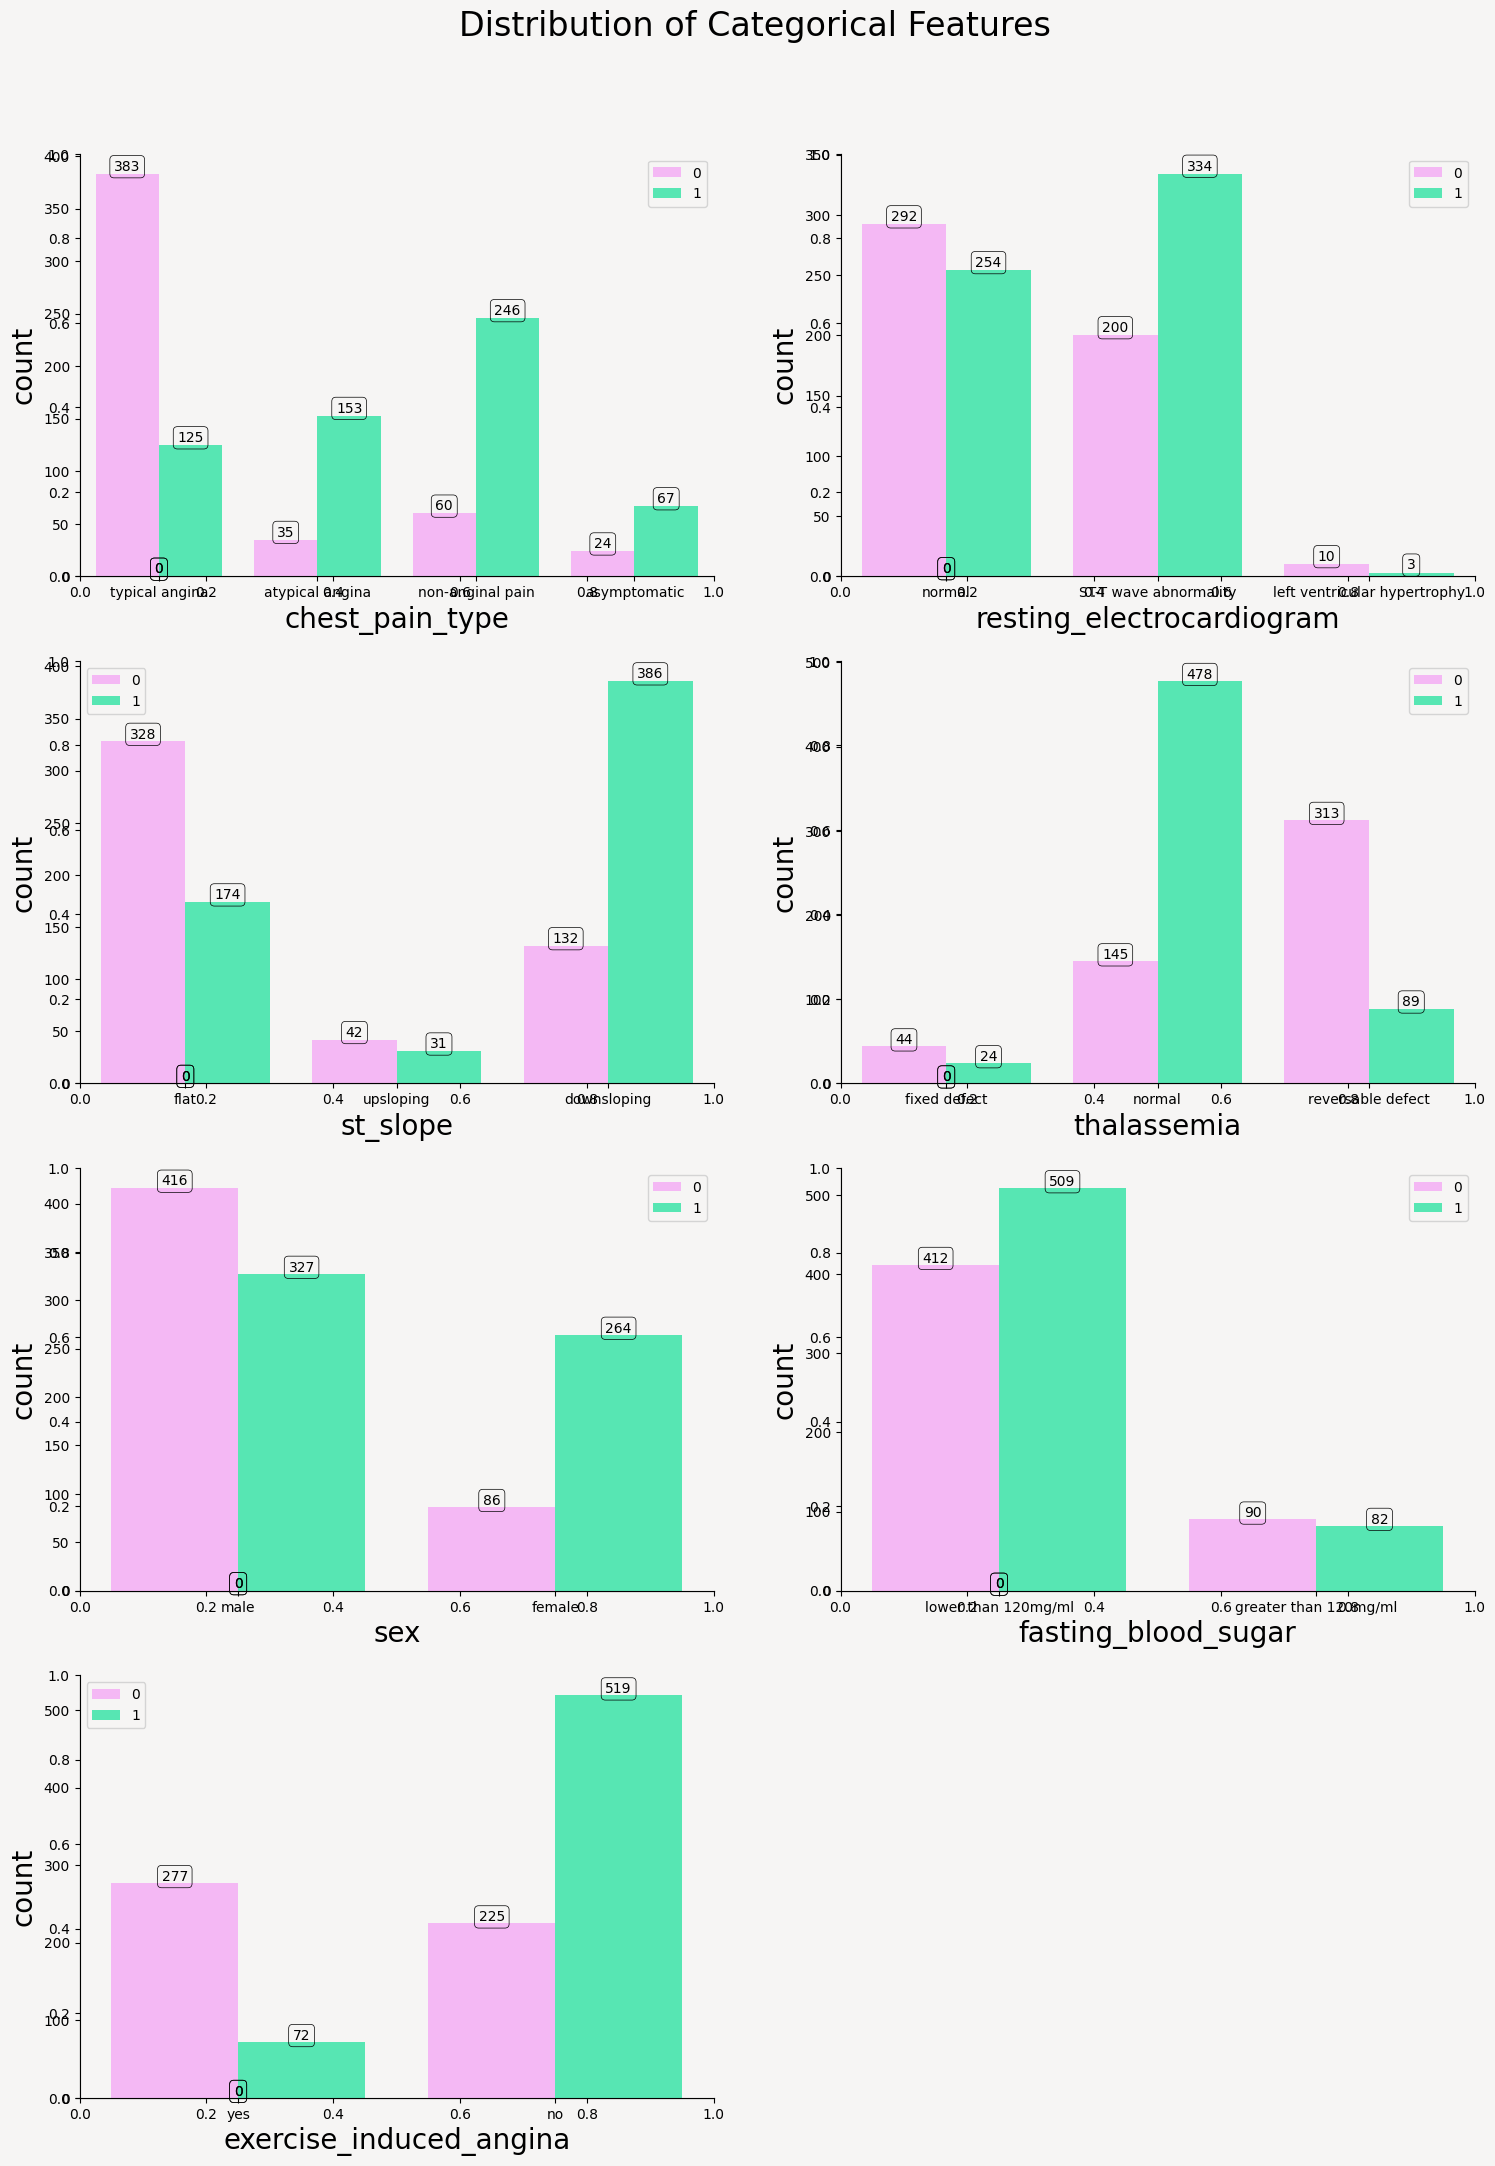

In [18]:
def count_plot(data, cat_feats):
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        plt.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

##  1.4 **Correlation Heatmaps** <a class="anchor" id="1.4"></a>

Correlation heatmap is a useful tool to graphyically represent how two features are related to eachother. Depending upon the data types of the features, we need to use the appropriate correlation coefficient calculation methods. Examples are pearson's correlation coefficient, point biserial correlation, cramers'V correlation and etc.

### 1.4.1 Pearson's correlation

* The Pearson correlation coefficient ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1. ([ref. ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient))

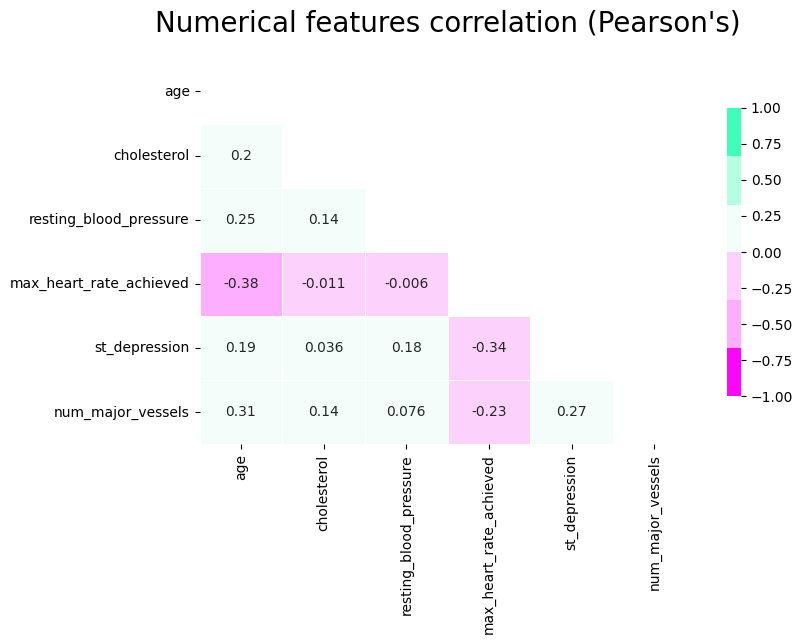

In [19]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

### 1.4.2 Point biserial correlation
- A point-biserial correlation is used to measure the strength and direction of the association that exists between **one continuous variable and one dichotomous variable**. It is a special case of the Pearson’s product-moment correlation, which is applied when you have two continuous variables, whereas in this case one of the variables is measured on a dichotomous scale [[ref. ](https://statistics.laerd.com/spss-tutorials/point-biserial-correlation-using-spss-statistics.php)].

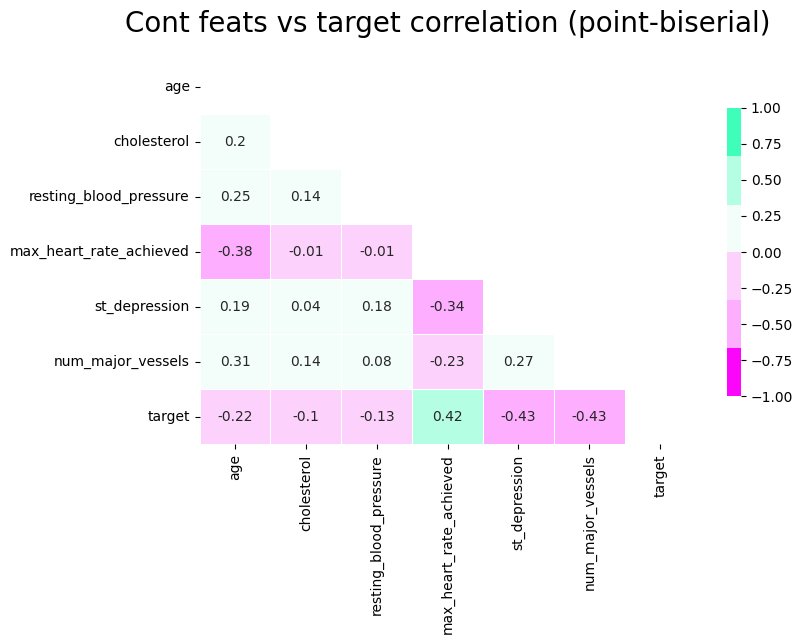

In [20]:
feats_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y])
        col.append(round(pbs,2))
    rows.append(col)

pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Cont feats vs target correlation (point-biserial)", fontsize=20, y= 1.05);

### 1.4.3 Cramer's V correlation

* In statistics, Cramér's V is a measure of association between **two nominal variables**, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946. [[ref. ](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)]

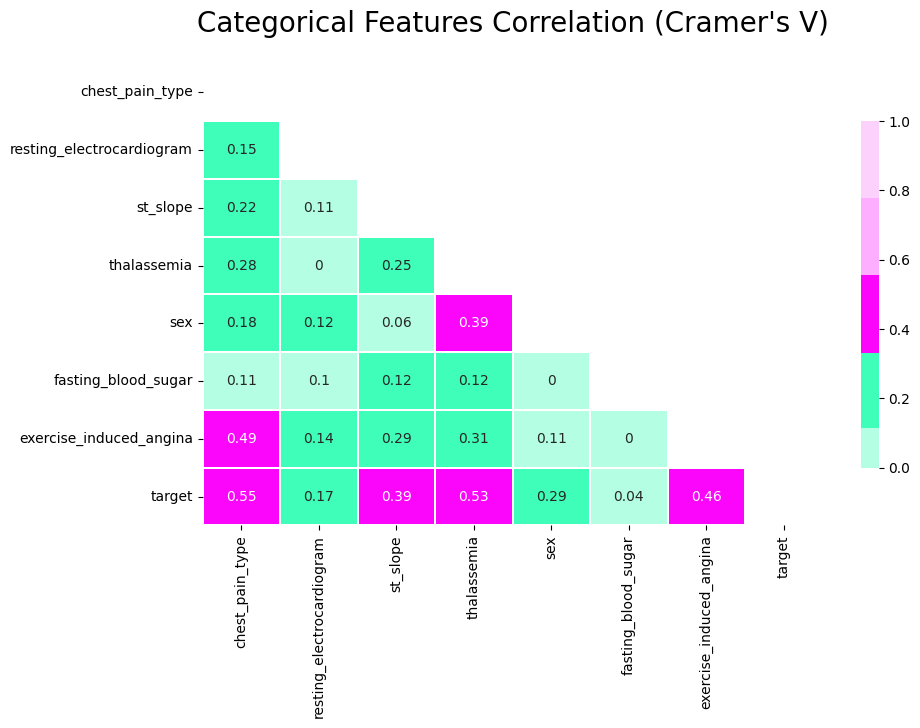

In [21]:
# the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y])
        col.append(round(cramers,2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);

<a href="#top">☝️ Back to top</a>

## **1.5 EDA Summary**: <a class="anchor" id="1.5"></a>

* Data size: 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!
* Data has no missing values
* Features (columns) data type:
    * Six features are numerical
    * The rest (seven features) are categorical variables
* Target variable is fairly balanced, 54% no-disease to 46% has-disease
* Correlations:
    * Correlation between features is weak at best
    * From the numerical features `num_major_vessels`, `max_heart_rate_achieved` and `st_depression` are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively.
    * From the categorical features `chest_pain_type`, `num_major_vessels`, `thalassemia`, and `exercise_induced_angina` are better correlated with the target variable, `thalassemia` being the highest at 0.52.
    * Cholestrol (to my surprize, but what do I know?) has less correlation with heart desease.
    
**Takeaway**: features that have higher predictive power could be, **`chest_pain_type`, `num_major_vessels`, `thalassemia`, `exercise_induced_angina` `max_heart_rate_achieved`** and **`st_depression`**. We will see which features will appear as imporatnt by the classification models.
            

---
# 2. **Predictions** <a class="anchor" id="2"></a>
---
**Note** : We have only 297 case (after data cleaning) which is a very small amount of data to do any serious prediction. Therefore, any conclusion made must be taken with cautions. This notebook is merely an excercise on binary classification algorithms.

## 2.1 **Scikit Learn Classifiers** <a class="anchor" id="2.1"></a>

This is a binary classification problem (has-disease or no-disease cases). Scikit learn offers a wide range of classification algorithms and is often the starting point in most/traditional machine learning challenges, so we start by exploring few of the classification alorithms from the sklearn libarary such as `Logistic Regression`, `Nearest Neighbors`, `Support Vectors`, `Nu SVC`, `Decision Tree`, `Random Forest`, `AdaBoost`, `Gradient Boosting`, `Naive Bayes`, `Linear Discriminant Analysis`, `Quadratic Discriminant Analysis` and `Neural Net`. Let's first build simple models using the above mentioned ML algorithms and later we will optimize them by tuning the parameters.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
import shap

In [30]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''

    label_encoder = LabelEncoder()
    data_encoded = data.copy()

    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])

    data = data_encoded

    return data


# def score_summary(names, classifiers):
#     '''
#     Given a list of classiers, this function calculates the accuracy,
#     ROC_AUC and Recall and returns the values in a dataframe
#     '''

#     cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
#     data_table = pd.DataFrame(columns=cols)

#     for name, clf in zip(names, classifiers):
#         clf.fit(X_train, y_train)

#         pred = clf.predict(X_val)
#         accuracy = accuracy_score(y_val, pred)

#         pred_proba = clf.predict_proba(X_val)[:, 1]

#         fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
#         roc_auc = auc(fpr, tpr)

#         # confusion matric, cm
#         cm = confusion_matrix(y_val, pred)

#         # recall: TP/(TP+FN)
#         recall = cm[1,1]/(cm[1,1] +cm[1,0])

#         # precision: TP/(TP+FP)
#         precision = cm[1,1]/(cm[1,1] +cm[0,1])

#         # F1 score: TP/(TP+FP)
#         f1 = 2*recall*precision/(recall + precision)

#         df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
#         data_table = data_table.append(df)

#     return(np.round(data_table.reset_index(drop=True), 2))
def score_summary(names, classifiers):
    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    rows = []

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        cm = confusion_matrix(y_val, pred)
        recall = cm[1,1] / (cm[1,1] + cm[1,0])
        precision = cm[1,1] / (cm[1,1] + cm[0,1])
        f1 = 2 * recall * precision / (recall + precision)

        rows.append([name, accuracy*100, roc_auc, recall, precision, f1])

    data_table = pd.DataFrame(rows, columns=cols)
    return np.round(data_table, 2)


# def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
#     '''
#     Plots confusion matrices in a subplots.

#     Args:
#         names : list of names of the classifier
#         classifiers : list of classification algorithms
#         nrows, ncols : number of rows and rows in the subplots
#         fig_a, fig_b : dimensions of the figure size
#     '''

#     fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

#     i = 0
#     for clf, ax in zip(classifiers, axes.flatten()):

#         clf.fit(X_train, y_train)
#         plot_confusion_matrix(clf, X_val, y_val, ax=ax)
#         ax.title.set_text(names[i])
#         i = i + 1

#     plt.tight_layout()
#     plt.show()

def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):

    '''
    Plots confusion matrices in a subplots.

    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):

        clf.fit(X_train, y_train)

        ConfusionMatrixDisplay.from_estimator(
            clf, X_val, y_val, ax=ax
        )

        ax.set_title(names[i])
        i += 1

    plt.tight_layout()
    plt.show()


def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves

    '''
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")


In [31]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]


### 2.1.1 Performance metric

There are several metrics that can be used to gauge the performance of a given classification algorithm. The choice of the '*appropriate*' metrics is then dependent on the type of problem we are dealing with. There are case where, for example, *accuracy* can be the right choice and in some other case a *recall* or *precision* could be more fitting to the purpose. Since we are dealing with medical case (classify if a case is positive for heart disease or not), we could use recall (true positive rate or sensitivity) as performance metrics to choose our classifier. Note here that we do not want to classify positive (has disease) cases as negative (no disease).

**Confusion matrix** : A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an *actual* class while each column represents the instances in a *predicted* class [[wiki](https://en.wikipedia.org/wiki/Confusion_matrix)]. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.

<div>    
<img src="https://miro.medium.com/max/875/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg" width="350", align="center"/>  
</div>

[Image credit >>](https://towardsdatascience.com/demystifying-confusion-matrix-29f3037b0cfa)

---

**Key**:

|**Term** |**Meaning** | **Descriptions**|
| --- |---|---|
|TP |True Positive|Positive cases which are predicted as positive|
|FP |False Positive|Negative cases which are predicted as positive|
|TN |True Negative|Negative cases which are predicted as negative|
|FN |False Negative|Positive casea which are predicted as negative|

---
**Accuracy** : Measures how many of the cases are correctly identified/predicted by the model, i.e correct prediction divided by the total sample size.

$\frac{TP + TN}{TP +TN + FP + FN}$

**Recall**: Measures the rate of *true positives*, i.e how many of the *actual* positive cases are *identified/predicted* as positive by the model.

$\frac{TP}{(TP + FN)}$

**Precision**: Measures how many of the positive predicted cases are actually positive.

$\frac{TP}{(TP + FP)}$

**F1-Score** : Combines the precision and recall of the model and it is defined as the harmonic mean of the model’s precision and recall.

$2\frac{recall * precision}{recall + precision}$

**ROC curves** : A receiver operating characteristic (ROC) curve, is a graphical plot which illustrates the performance of a binary classification algorithm as a function of ture positive rate and false positive rate.

<a href="#top">☝️ Back to top</a>

### 2.1.2 Performance metrics summary table

In [32]:
score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
5,Random Forest,98.910000,1.000000,0.990000,0.990000,0.990000
7,Gradient Boosting,96.720000,0.990000,0.970000,0.970000,0.970000
4,Decision Tree,95.620000,0.950000,0.970000,0.950000,0.960000
1,Nearest Neighbors,90.880000,0.950000,0.900000,0.930000,0.920000
0,Logistic Regression,87.960000,0.940000,0.940000,0.860000,0.900000
8,Naive Bayes,87.230000,0.920000,0.910000,0.870000,0.890000
6,AdaBoost,86.860000,0.950000,0.890000,0.880000,0.880000
11,Neural Net,86.860000,0.930000,0.940000,0.840000,0.890000
9,Linear DA,86.500000,0.940000,0.930000,0.840000,0.890000
3,Nu SVC,85.770000,0.940000,0.970000,0.810000,0.880000


### 2.1.3 ROC curves

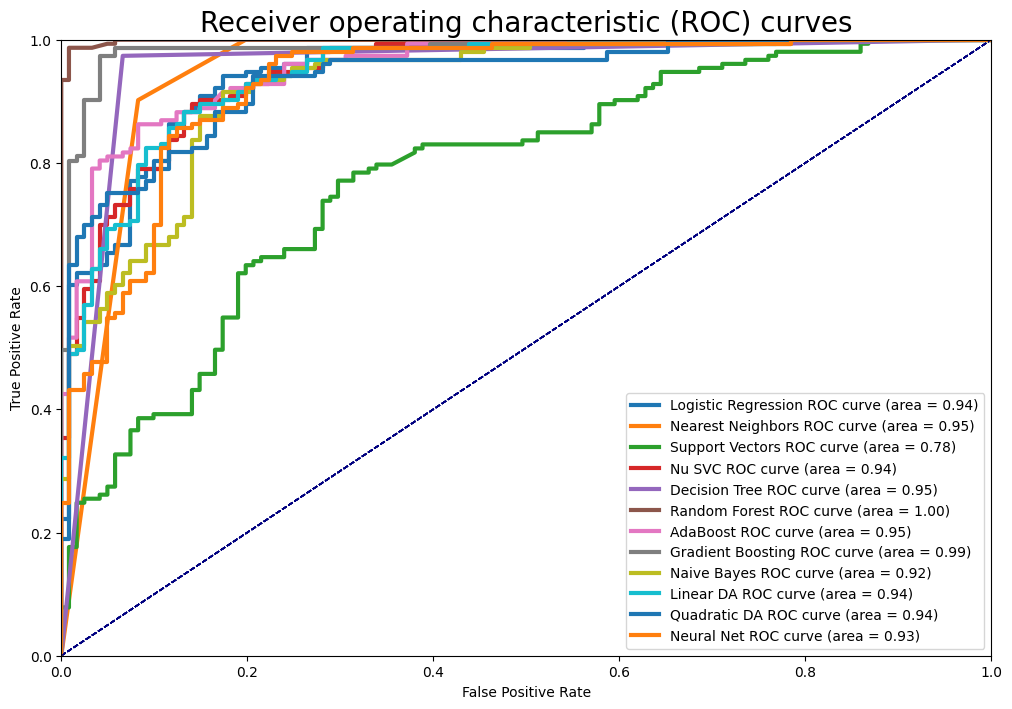

In [33]:
roc_auc_curve(names, classifiers)

### 2.1.4 Confusion matrix

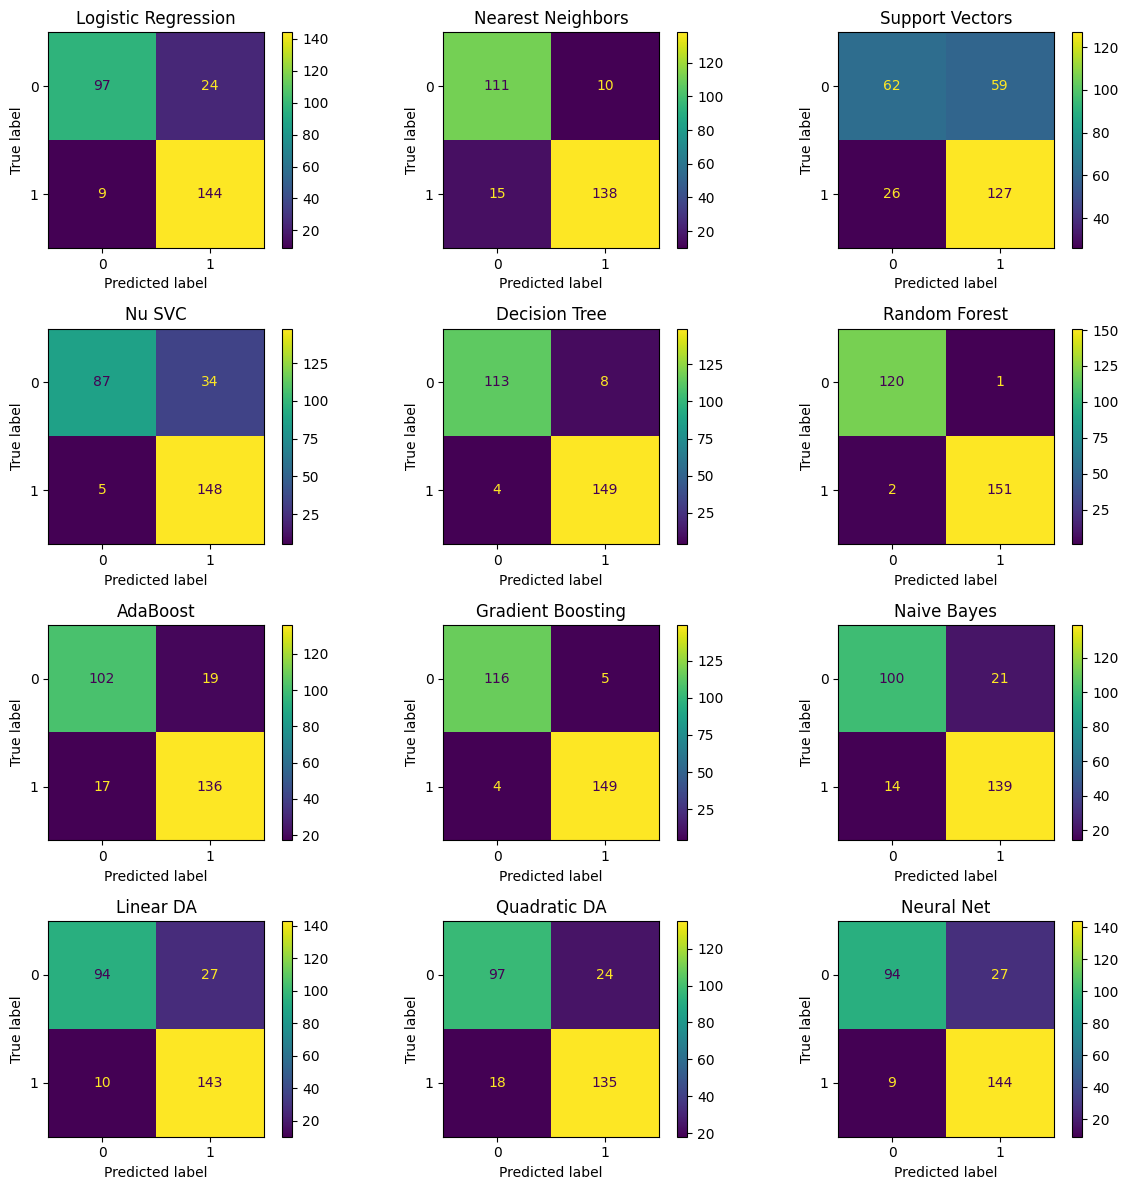

In [34]:
plot_conf_matrix(names, classifiers, nrows=4, ncols=3, fig_a=12, fig_b=12)

Now we have seen all the performance metrics of the classifiers, it is decision time for us to choose the best possible classifier algorithm. Based on precision LR ranks first (86%); whereas if we see the recall, Neural Nets ranks first with 94%. In the case of precision, QDA ranks first with 85%. So which one to choose? The F1-score can give us a balance between recall and precision. LR happens to have the best F1-score so we choose Logistic Regression as our best classifier.

**Note**: If I were consulting a clinic doing a heart disease screening test, I would like to strike a perfect balance between precision and recall (I don't want the clinic to risk their reputation of by handing out too many false positive result but all without risking their clients' health by predicting too many false negatives). Therefore, I would advice them to choose the model which gives a higher F1-score, i.e the Logistic regression model.

### 2.1.5 Parameter Tuning (RandomizedSearch): LogisticRegression

So chosen our best classifier, the Logistic regression model. However, this was achieved with default parameters. The intuition is that we could further improve our model with tuned parameters. Let's see if could achieve that using the scikit-learn RandomizedSearch algorithm.  

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr,
                         space,
                         random_state=seed,
                         cv = 5,
                         scoring='f1')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Hyperparameters: {'C': np.float64(1.9172075941288886), 'penalty': 'l2', 'solver': 'liblinear'}


In [36]:
params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       121
           1       0.86      0.92      0.89       153

    accuracy                           0.87       274
   macro avg       0.88      0.87      0.87       274
weighted avg       0.87      0.87      0.87       274



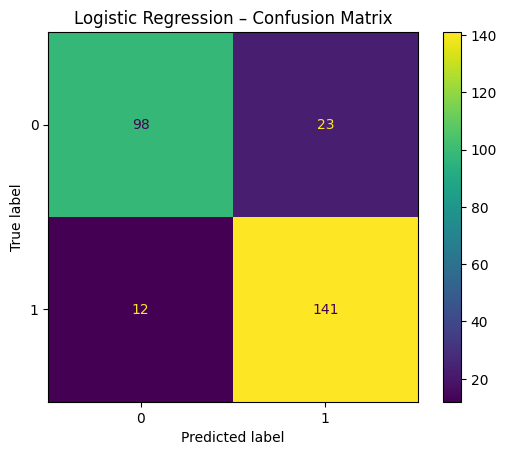

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(lr, X_val, y_val)
plt.title("Logistic Regression – Confusion Matrix")
plt.show()


**Remark** : It turns out that our base model (default params) is not bad at all. Parameter tuning did not help to further increase the performance.



## 2.2 **Catboost, Lgbm and Xgboost** <a class="anchor" id="2.2"></a>

In the above section (&&2.1) we have seen classifiers out of the scikit-learn library. Now we will try the modern (boosted trees) ML algorithms such as the [**catboost**](https://catboost.ai/), [**xgboost**](https://xgboost.readthedocs.io/en/stable/#) and [**lgbm**](https://lightgbm.readthedocs.io/en/latest/index.html). They are optimized machine learning algorithms based on the [**gradient-boosting**](https://en.wikipedia.org/wiki/Gradient_boosting) technique. Depending on the problem at hand, one algorithm is may be better suited than others. For detailed info one can easily refer to their documentations.

In [41]:
!pip install -q catboost xgboost lightgbm

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names_boost =[
    'Catboost',
    'xgbbost',
    'light GBM'
]
classifiers = [
    CatBoostClassifier(random_state=seed, verbose=0),
    XGBClassifier(objective= 'binary:logistic', random_state=seed),
    LGBMClassifier(random_state=seed)
   ]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


### 2.2.1 Performance metrics summary table

In [42]:
score_summary(names_boost, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

[LightGBM] [Info] Number of positive: 438, number of negative: 381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 819, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534799 -> initscore=0.139420
[LightGBM] [Info] Start training from score 0.139420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Catboost,98.910000,1.000000,0.990000,0.990000,0.990000
2,light GBM,98.180000,1.000000,0.990000,0.980000,0.980000
1,xgbbost,97.810000,1.000000,0.970000,0.990000,0.980000


### 2.2.2 Confusion matrix

[LightGBM] [Info] Number of positive: 438, number of negative: 381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 819, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534799 -> initscore=0.139420
[LightGBM] [Info] Start training from score 0.139420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


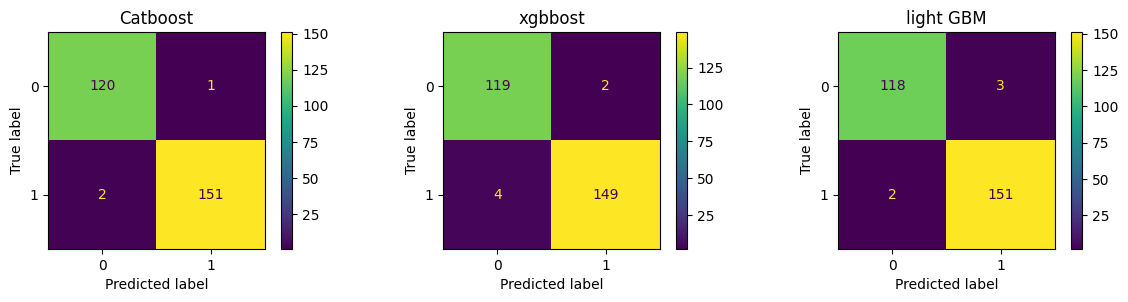

In [43]:
plot_conf_matrix(names=names_boost, classifiers=classifiers, nrows=1, ncols=3, fig_a=12, fig_b=3);

**Remark** : Here we can see that the lgbm calssifier is marginally better than the other two and we will go for it. Following the same procedure, we will try to tune the parameters in the next section.

### 2.2.3 Parameter Tuning (RandomizedSearch): LGBMClassifier

In [44]:
from sklearn.model_selection import GridSearchCV
rs_params = {
    'num_leaves': [20, 100],
    'max_depth': [5, 15],
    'min_data_in_leaf': [80, 120],
}
rs_cv = GridSearchCV(estimator=LGBMClassifier(random_state=seed, verbose=-1),
                           param_grid=rs_params,
                           cv = 5)

rs_cv.fit(X_train, y_train)
params = rs_cv.best_params_
params

{'max_depth': 5, 'min_data_in_leaf': 80, 'num_leaves': 20}

In [47]:
lgbm = LGBMClassifier(**params);

# lgbm.fit(X_train, y_train,
#         eval_set=(X_val, y_val),
#         verbose=False,
# );
lgbm.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)]
)


print(classification_report(y_val, lgbm.predict(X_val)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       121
           1       0.97      0.94      0.95       153

    accuracy                           0.95       274
   macro avg       0.95      0.95      0.95       274
weighted avg       0.95      0.95      0.95       274



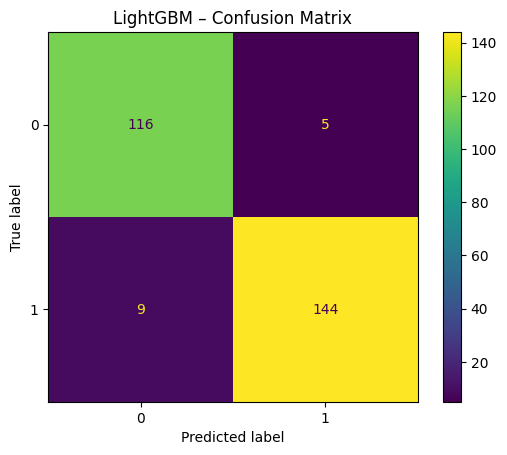

In [49]:
# plot_confusion_matrix(lgbm, X_val, y_val);
ConfusionMatrixDisplay.from_estimator(lgbm, X_val, y_val)
plt.title("LightGBM – Confusion Matrix")
plt.show()

**Remark**: In this case (Lgbm) hyper-parameter tuning gave better results than the base model. We have increased the recall value from 86% to 94%. Which means we have decrease the rate of false negatives from 5 cases to 2 in our validation set and we have also decreased the false positive cases by 1. Marginal but we will take every percentage point we can get.

<a href="#top">☝️ Back to top</a>

## 2.3 **Model Explainablity** <a class="anchor" id="2.3"></a>

One of the challenges of a machine leaning project is explaining the model's prediction. A model might consider some features more important than other for its prediction. Another model might weigh other features as more important. **Permutation importance** and **SHAP** are two methods one can use to understand which features were selected to have the most impact on our model's prediction.

### 2.3.1 Permutation importance:
The permutation importance is defined to be the **decrease in a model score** when a **single feature value** is *randomly shuffled*. The procedure breaks the relationship between the *feature* and the *target*, thus the drop in the **model score** is indicative of how much the model depends on the feature [[3](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)]. In other words, permutation importance tell us what features have the biggest impact on our model predictions.

In [51]:
!pip install -q eli5
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(lgbm, random_state=seed).fit(X_train, y_train)
eli5.show_weights(perm_imp, feature_names = X_val.columns.tolist())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.5 MB/s eta 0:00:00


Weight,Feature
0.1128 ± 0.0116,num_major_vessels
0.0899 ± 0.0091,chest_pain_type
0.0606 ± 0.0162,age
0.0505 ± 0.0050,sex
0.0400 ± 0.0081,cholesterol
0.0391 ± 0.0121,thalassemia
0.0274 ± 0.0101,st_depression
0.0254 ± 0.0111,max_heart_rate_achieved
0.0222 ± 0.0047,st_slope
0.0215 ± 0.0070,resting_blood_pressure


### 2.3.2 SHAP:

**SHAP**, a short name for **SH**apely **A**dditive Ex**P**lanations, is a method used to explain the output of a machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions [[5](https://shap.readthedocs.io/en/latest/index.html)]. SHAP has a rich functionality (methods) by which we can visualize/interpret the output of our models. Below we use the `shap.summary_plot()` to identify the impact each feature has on the predicted output.


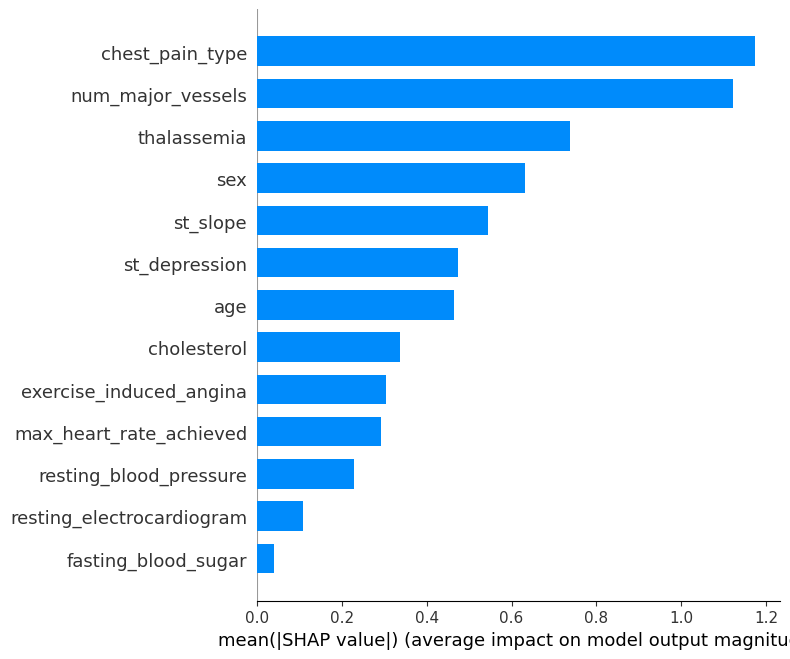

In [52]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val,
                  feature_names=features,
                  plot_type="bar",
                 )

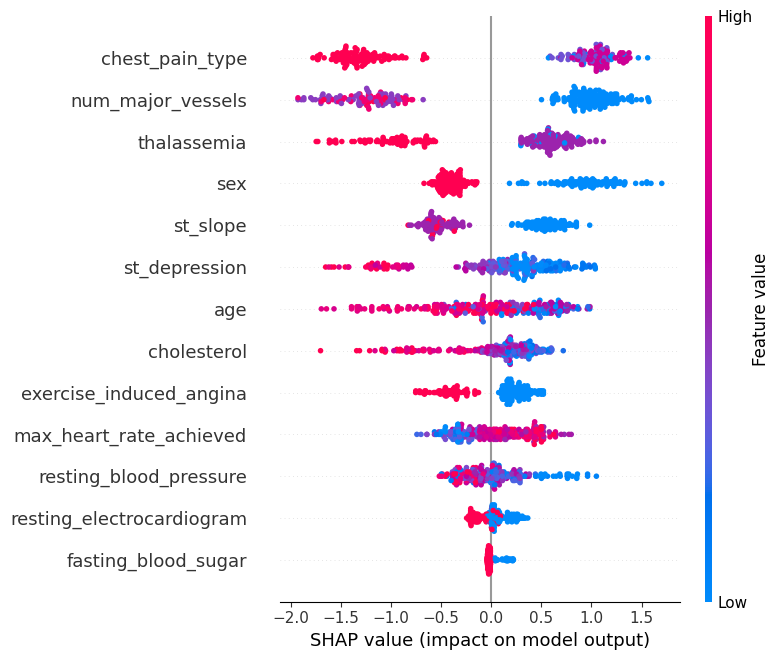

In [54]:
# beeswarm plot
shap.summary_plot(shap_values, X_val)

---
# 3. **Concluding Remark** <a class="anchor" id="3"></a>
---
At the start of this notebook, we laid out what we wanted to do with this project; to explore the heart disease dataset (EDA) and practice binary classification (modeling). In part one (EDA) we did explore the dataset, did a sanity check and removed some 'faulty' data and other pre-processing. We also tried to identify correlation between features and also with the target variable. In part two we practiced how to set-up binary classifiers; first starting with base models and finally arriving at our best model via hyper-parameter tuning. Some of the highlights are summarized below.

- Our best model happens to be LGBM classifier (tuned with randomizedSearch)
- According to both `eli5` permutation importance and `SHAP` the three most important features of the model are `num_major_vessels`, `chest_pain_type`, and `st_slope`. These features are also among better correlated features from our EDA.
- Contrary to my intuition `cholesterol` happens to be not an important feature for the model (both eli5 and SHAP did not pick this feature as important).
- Although it is not shown in this notebook, varying the test/train ratio resulted in different performance metrics for the classifiers we have on our list. So if you change the ratio you might get different results.




# 4. **Reference** <a class="anchor" id="4"></a>

1. https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model
2. https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
3. https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
4. https://www.kaggle.com/learn/machine-learning-explainability
5. https://shap.readthedocs.io/en/latest/index.html
6. https://www.healthline.com/health/serum-cholesterol#treatment
7. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)
8. https://www.indushealthplus.com/heart-diseases.html)

## **End of Notebook!**

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">

<font color="white" size=+1.0><b>Thank you for reading!</b></font>
    
<font color="white" size=+1.0><b>If you have any feedback or comments please let me know.</b></font>
    
</blockquote>

<a href="#top">☝️ Back to top</a>